
1. Download Dataset

The Dataset is Churn_Modelling.csv 
> 

>





In [3]:
import numpy as np

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Dataset

In [6]:
df = pd.read_csv("Churn_Modelling.csv")
df

FileNotFoundError: ignored

3. (1) Univariate Analysis

[Text(0.5, 1.0, 'Age Distribution')]

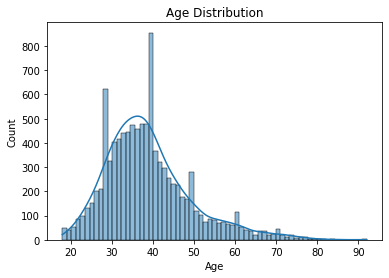

In [ ]:
sns.histplot(df.Age, kde = True).set(title = 'Age Distribution')

[Text(0.5, 1.0, 'CreditScore Distribution')]

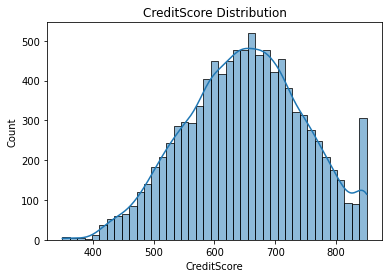

In [ ]:
sns.histplot(df.CreditScore, kde = True).set(title = 'CreditScore Distribution')

3.(2) Bi - variate Analysis 

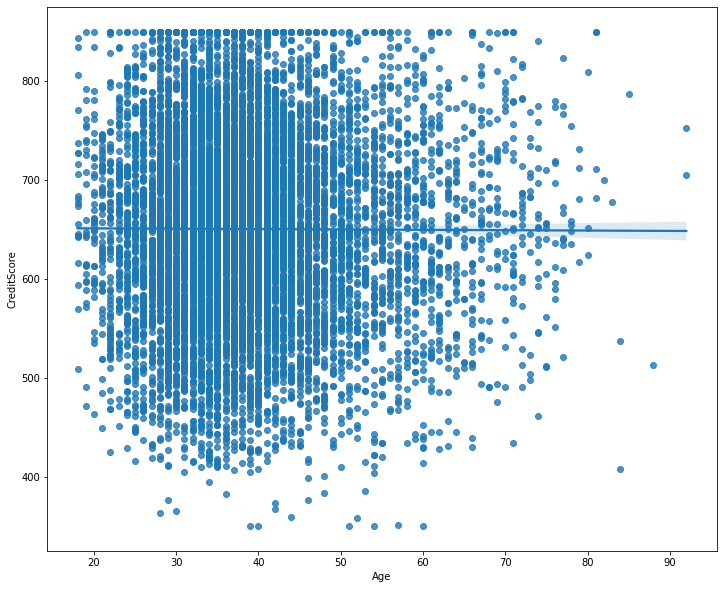

In [ ]:
plt.figure(figsize=(12,10))
sns.regplot(x="Age", y="CreditScore", data=df)

3.(3) Multi - Variate Analysis

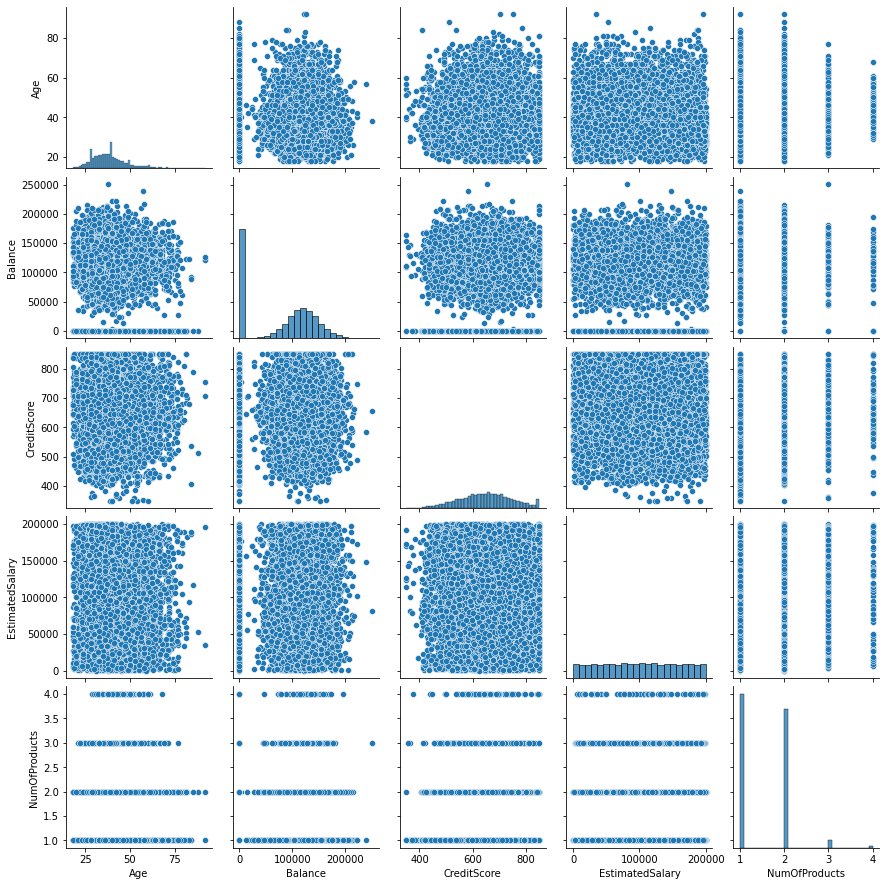

In [ ]:
sns.pairplot(data=df[['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'NumOfProducts']])


4.Perform descriptive statistics on the dataset.

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


5.Handle the Missing values.


In [ ]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

RowNumber
False    10000
Name: RowNumber, dtype: int64

CustomerId
False    10000
Name: CustomerId, dtype: int64

Surname
False    10000
Name: Surname, dtype: int64

CreditScore
False    10000
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    10000
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    10000
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



6.Find the outliers and replace the outliers


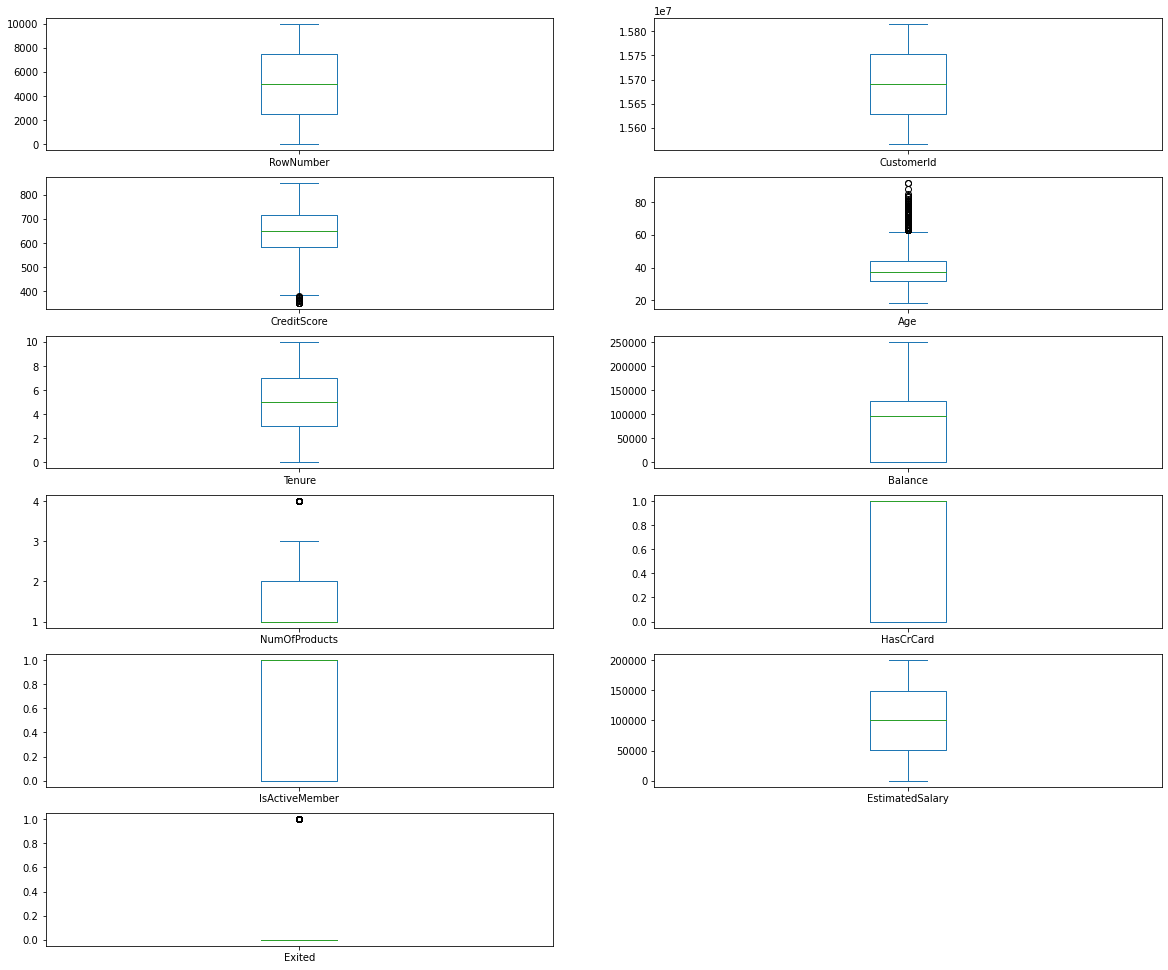

In [ ]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(20,20));

7.Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,0,0,28,4,130142.79,1,1,0,38190.78,0


8.Split the data into dependent and independent variables.

In [2]:
independent_variables = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].values
independent_variables

NameError: ignored

In [ ]:
dependent_variable = df[['Exited']].values
dependent_variable

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

9. Scale the independent variables

In [1]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled = scale.fit_transform(independent_variables)
print(scaled)

NameError: ignored

10. Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
training_data,testing_data = train_test_split(df, test_size = 0.2, random_state = 20) 

In [ ]:
print(training_data.shape)
print(testing_data.shape)

(8000, 14)
(2000, 14)
